# Telecom Customer Churn Prediction

Churn means how many people leave your company, like for example if they cancel their phone plan with the Telco company.

The record contains information about:

- Whether customers have canceled within the last month — the column is called “Churn”.
- **Services each customer has signed up for** — phone, multiple lines, internet, online security, online backup, device protection, tech support, and TV and movie streaming
- **Customer account information** — how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- **Customer demographic information** — gender, age range, and whether they have partners and dependents

## Importing Libraries dan Data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
sns.set()
import datetime as dt
import warnings
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Understanding

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
for i in list(df.columns):
    print("{} -> {}".format(i, df[i].value_counts().shape[0]))

customerID -> 7043
gender -> 2
SeniorCitizen -> 2
Partner -> 2
Dependents -> 2
tenure -> 73
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
MonthlyCharges -> 1585
TotalCharges -> 6531
Churn -> 2


## Data Preperation

In [11]:
#Checking the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Convert TotalCharges data type to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
p = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
t = df.isnull().sum().sort_values(ascending=False)

m_data = pd.concat([t, p], axis=1, keys=['Total', 'Percent'])
m_data

,Total,Percent
TotalCharges,11,0.001562
customerID,0,0.000000
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


In [14]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [17]:
df = df.fillna(df["TotalCharges"].mean())

In [18]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Convert SeniorCitizen data type to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

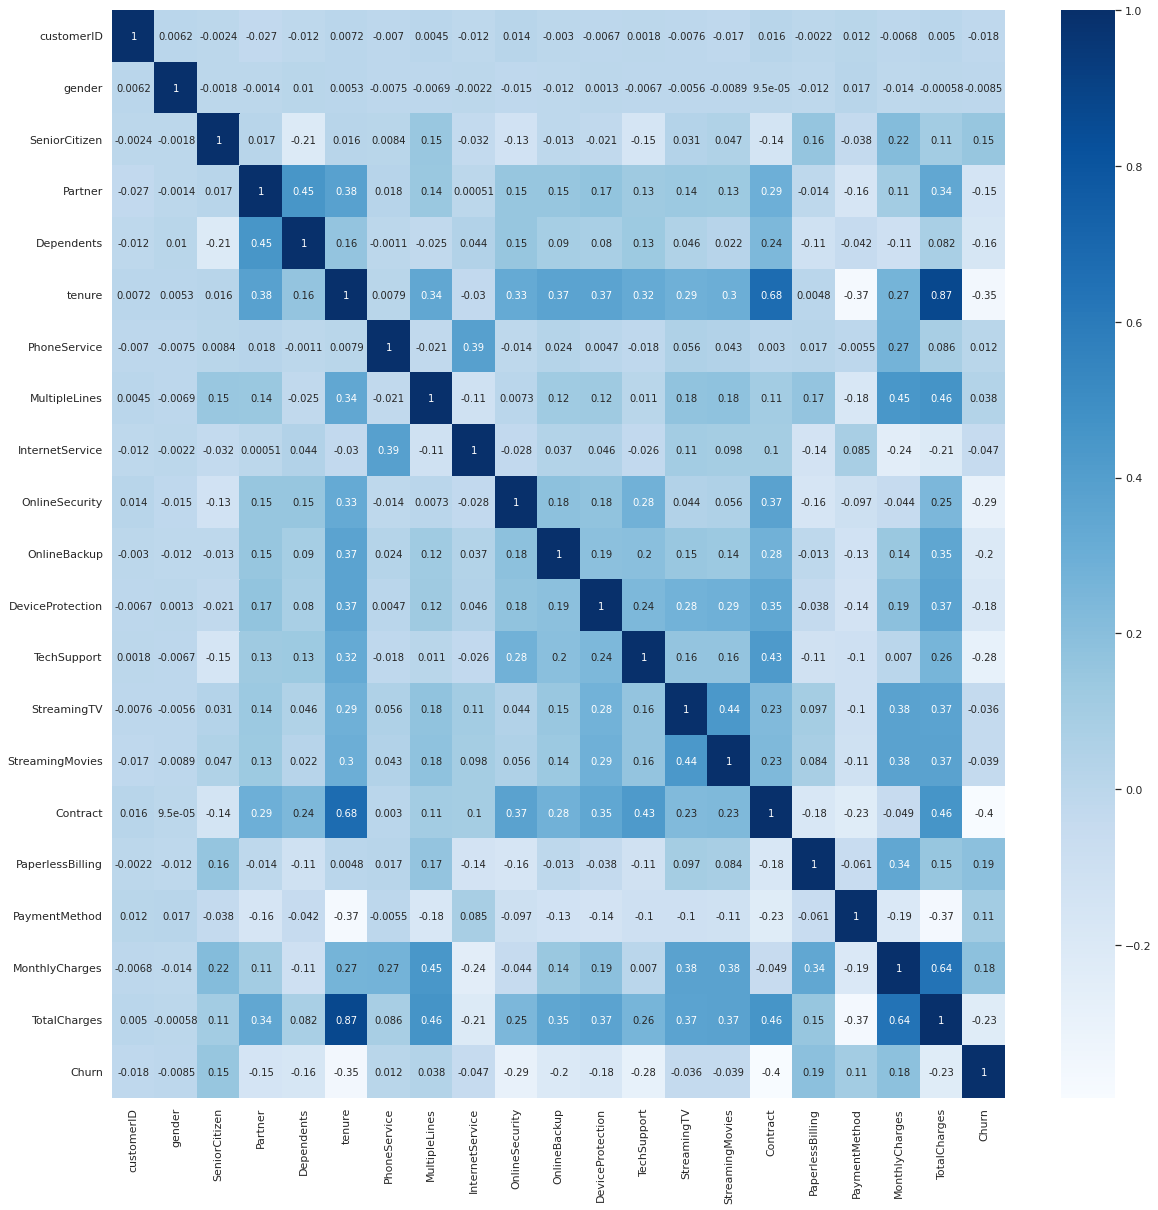

In [20]:
from sklearn.preprocessing import LabelEncoder
df_num = df.copy()

labelencoder=LabelEncoder()
for column in df_num.columns:
    df_num[column] = labelencoder.fit_transform(df_num[column])

plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(),cbar=True,annot=True,cmap='Blues')

**Observations:**
- Tenure has a strong correlation with monthly charges and contracts. 
- These two variables can be removed to test modeling with selected features to find out the effect of multicollinearity.

In [21]:
#Getting all the categorical columns except the target
categorical_columns = df.select_dtypes(exclude = 'number').drop('Churn', axis = 1).columns

## Feature Engineering

### 1.1 Feature Selection

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
# Import the function
from scipy.stats import chi2_contingency

chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['Churn'], df[i]))[1] < 0.01:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

              Column                      Hypothesis
0         customerID  Fail to Reject Null Hypothesis
1             gender  Fail to Reject Null Hypothesis
2      SeniorCitizen          Reject Null Hypothesis
3            Partner          Reject Null Hypothesis
4         Dependents          Reject Null Hypothesis
5       PhoneService  Fail to Reject Null Hypothesis
6      MultipleLines          Reject Null Hypothesis
7    InternetService          Reject Null Hypothesis
8     OnlineSecurity          Reject Null Hypothesis
9       OnlineBackup          Reject Null Hypothesis
10  DeviceProtection          Reject Null Hypothesis
11       TechSupport          Reject Null Hypothesis
12       StreamingTV          Reject Null Hypothesis
13   StreamingMovies          Reject Null Hypothesis
14          Contract          Reject Null Hypothesis
15  PaperlessBilling          Reject Null Hypothesis
16     PaymentMethod          Reject Null Hypothesis


In [24]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(df[i])
    bon_p_value = 0.05/df[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df['Churn'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']

In [25]:
res_chi_ph.Pair.values.tolist()

['SeniorCitizen-No',
 'SeniorCitizen-Yes',
 'Partner-No',
 'Partner-Yes',
 'Dependents-No',
 'Dependents-Yes',
 'MultipleLines-No',
 'MultipleLines-No phone service',
 'MultipleLines-Yes',
 'InternetService-DSL',
 'InternetService-Fiber optic',
 'InternetService-No',
 'OnlineSecurity-No',
 'OnlineSecurity-No internet service',
 'OnlineSecurity-Yes',
 'OnlineBackup-No',
 'OnlineBackup-No internet service',
 'OnlineBackup-Yes',
 'DeviceProtection-No',
 'DeviceProtection-No internet service',
 'DeviceProtection-Yes',
 'TechSupport-No',
 'TechSupport-No internet service',
 'TechSupport-Yes',
 'StreamingTV-No',
 'StreamingTV-No internet service',
 'StreamingTV-Yes',
 'StreamingMovies-No',
 'StreamingMovies-No internet service',
 'StreamingMovies-Yes',
 'Contract-Month-to-month',
 'Contract-One year',
 'Contract-Two year',
 'PaperlessBilling-No',
 'PaperlessBilling-Yes',
 'PaymentMethod-Bank transfer (automatic)',
 'PaymentMethod-Credit card (automatic)',
 'PaymentMethod-Electronic check',
 

## Data Preprocessing for Modelling

In [26]:
from sklearn import preprocessing

category = ['gender' ,'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_model = df.copy()
le = preprocessing.LabelEncoder()
df_model[category] = df_model[category].apply(le.fit_transform)

In [27]:
not_cols = ['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges', 'Churn', 'gender' , 'SeniorCitizen', 'Partner',
           'Dependents', 'PhoneService',  'PaperlessBilling']
df_dummies = pd.get_dummies(data=df_model, columns=[col for col in df_model.columns if col not in not_cols])

In [28]:
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

In [29]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = X.copy()
X_scaled[['tenure','MonthlyCharges','TotalCharges']]= scale.fit_transform(X[['tenure','MonthlyCharges','TotalCharges']])
X_scaled.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,...,1,0,0,1,0,0,0,0,1,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 40, stratify=y)

In [31]:
X_train_scaled = X_train.drop(columns = ['customerID'])
X_test_scaled = X_test.drop(columns = ['customerID'])

In [32]:
X_train_scaled.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
983,1,0,0,0,-1.280248,1,1,0.724701,-0.969157,0,...,0,0,1,1,0,0,0,0,1,0
6565,1,0,1,0,1.164390,1,1,1.376214,1.805295,0,...,0,0,1,1,0,0,0,0,1,0
2212,1,0,0,0,-0.913552,1,0,-1.505733,-0.907721,1,...,0,1,0,0,1,0,0,0,0,1
2526,1,0,0,0,-1.280248,1,0,-1.509057,-0.998804,1,...,0,1,0,1,0,0,0,0,0,1
2751,0,0,1,1,-0.546857,0,1,-1.327896,-0.815535,0,...,1,0,0,1,0,0,0,0,0,1
1539,0,0,1,1,-1.158016,1,0,-0.481927,-0.911582,1,...,1,0,0,1,0,0,0,0,1,0
970,0,0,0,0,-1.280248,1,0,0.856001,-0.967414,1,...,0,0,1,1,0,0,0,0,1,0
2742,1,0,0,0,1.368109,1,0,0.131359,0.954840,0,...,1,0,0,0,0,1,1,0,0,0
6557,0,0,0,0,0.023559,1,1,1.170123,0.457644,0,...,0,0,1,1,0,0,0,0,1,0
1023,0,1,1,0,0.512486,1,1,0.708081,0.696260,1,...,0,0,1,1,0,0,0,0,1,0


## Model Building (Baseline Validation Performance)

With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

- Naive Bayes (68.39%)
- Logistic Regression (80.01%)
- Decision Tree (72.29%)
- K Nearest Neighbor (76.09%)
- Random Forest (76.67%)
- Support Vector Classifier (79.46%)
- XGBoost (80.27%)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [34]:
#naive Bayes as a baseline 
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb, X_train_scaled, y_train, cv=5).mean()
gnb.fit(X_train_scaled,y_train) 
y_predict = gnb.predict(X_test_scaled)
gnb1 = precision_score(y_test,y_predict)
gnb2 = recall_score(y_test,y_predict)
gnb3 = f1_score(y_test,y_predict)
gnb4 = accuracy_score(y_test,y_predict)

#logistic regression model
lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5).mean()
lr.fit(X_train_scaled,y_train) 
y_predict = lr.predict(X_test_scaled)
lr1 = precision_score(y_test,y_predict)
lr2 = recall_score(y_test,y_predict)
lr3 = f1_score(y_test,y_predict)
lr4 = accuracy_score(y_test,y_predict)

#decision tree model
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5).mean()
dt.fit(X_train_scaled,y_train) 
y_predict = dt.predict(X_test_scaled)
dt1 = precision_score(y_test,y_predict)
dt2 = recall_score(y_test,y_predict)
dt3 = f1_score(y_test,y_predict)
dt4 = accuracy_score(y_test,y_predict)

#random forest model
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train_scaled,y_train,cv=5).mean()
rf.fit(X_train_scaled,y_train) 
y_predict = rf.predict(X_test_scaled)
rf1 = precision_score(y_test,y_predict)
rf2 = recall_score(y_test,y_predict)
rf3 = f1_score(y_test,y_predict)
rf4 = accuracy_score(y_test,y_predict)

#knn model
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
knn.fit(X_train_scaled,y_train) 
y_predict = knn.predict(X_test_scaled)
knn1 = precision_score(y_test,y_predict)
knn2 = recall_score(y_test,y_predict)
knn3 = f1_score(y_test,y_predict)
knn4 = accuracy_score(y_test,y_predict)

#supporrt vector classification model
svc = SVC(probability = True)
cv_svc = cross_val_score(svc, X_train_scaled, y_train, cv=5).mean()
svc.fit(X_train_scaled,y_train) 
y_predict = svc.predict(X_test_scaled)
svc1 = precision_score(y_test,y_predict)
svc2 = recall_score(y_test,y_predict)
svc3 = f1_score(y_test,y_predict)
svc4 = accuracy_score(y_test,y_predict)

#xgboost model
xgb = XGBClassifier(random_state =1)
cv_xgb = cross_val_score(xgb, X_train_scaled, y_train, cv=5).mean()
xgb.fit(X_train_scaled,y_train) 
y_predict = xgb.predict(X_test_scaled)
xgb1 = precision_score(y_test,y_predict)
xgb2 = recall_score(y_test,y_predict)
xgb3 = f1_score(y_test,y_predict)
xgb4 = accuracy_score(y_test,y_predict)

In [35]:
dic = {'Model':['GaussianNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
                'SVC', 'XGBClassifier'],
       'Precision':[gnb1,lr1,dt1,rf1,knn1,svc1,xgb1],
       'Recall':[gnb2,lr2,dt2,rf2,knn2,svc2,xgb2],
       'F1':[gnb3,lr3,dt3,rf3,knn3,svc3,xgb3],
       'Accuracy':[gnb4,lr4,dt4,rf4,knn4,svc4,xgb4],
       'Cross Validation':[cv_gnb, cv_lr, cv_dt, cv_rf, cv_knn, cv_svc, cv_xgb]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Cross Validation
1,LogisticRegression,0.668737,0.575758,0.618774,0.811374,0.800283
5,SVC,0.684579,0.522282,0.592518,0.809005,0.794597
6,XGBClassifier,0.655462,0.556150,0.601736,0.804265,0.802724
3,RandomForestClassifier,0.606383,0.508021,0.552861,0.781517,0.786668
4,KNeighborsClassifier,0.558824,0.541889,0.550226,0.764455,0.760868
2,DecisionTreeClassifier,0.486134,0.531194,0.507666,0.726066,0.722874
0,GaussianNB,0.467495,0.871658,0.608587,0.701896,0.683867


In [36]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77766497 0.81015228 0.78556911 0.80081301 0.79166667]
0.7931732078742106


### Model with Selected Features via the Chi-Square Test of Independence 

In [37]:
significant_chi = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'TotalCharges',
       'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [38]:
X_train_scaled[significant_chi].columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'TotalCharges',
       'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
#logistic regression model
lr = LogisticRegression(max_iter = 2000)
cv_lr_sf = cross_val_score(lr, X_train_scaled[significant_chi], y_train, cv=5).mean()
lr.fit(X_train_scaled[significant_chi], y_train) 
y_predict_lr_sf = lr.predict(X_test_scaled[significant_chi])

lr1_sf = precision_score(y_test,y_predict_lr_sf)
lr2_sf = recall_score(y_test,y_predict_lr_sf)
lr3_sf = f1_score(y_test,y_predict_lr_sf)
lr4_sf = accuracy_score(y_test,y_predict_lr_sf)

#Random forest model
rf = RandomForestClassifier(random_state = 1)
cv_rf_sf = cross_val_score(rf,X_train_scaled[significant_chi],y_train,cv=5).mean()
rf.fit(X_train_scaled[significant_chi],y_train) 
y_predict_rf_sf = rf.predict(X_test_scaled[significant_chi])

rf1_sf = precision_score(y_test,y_predict_rf_sf)
rf2_sf = recall_score(y_test,y_predict_rf_sf)
rf3_sf = f1_score(y_test,y_predict_rf_sf)
rf4_sf = accuracy_score(y_test,y_predict_rf_sf)

#Support vector classification model
svc = SVC(probability = True)
cv_svc_sf = cross_val_score(svc, X_train_scaled[significant_chi], y_train, cv=5).mean()
svc.fit(X_train_scaled[significant_chi],y_train) 
y_predict_svc_sf = svc.predict(X_test_scaled[significant_chi])

svc1_sf = precision_score(y_test,y_predict_svc_sf)
svc2_sf = recall_score(y_test,y_predict_svc_sf)
svc3_sf = f1_score(y_test,y_predict_svc_sf)
svc4_sf = accuracy_score(y_test,y_predict_svc_sf)

#Xgboost model
xgb = XGBClassifier(random_state =1)
cv_xgb_sf = cross_val_score(xgb, X_train_scaled[significant_chi], y_train, cv=5).mean()
xgb.fit(X_train_scaled[significant_chi],y_train) 
y_predict_xgb_sf = xgb.predict(X_test_scaled[significant_chi])

xgb1_sf = precision_score(y_test,y_predict_xgb_sf)
xgb2_sf = recall_score(y_test,y_predict_xgb_sf)
xgb3_sf = f1_score(y_test,y_predict_xgb_sf)
xgb4_sf = accuracy_score(y_test,y_predict_xgb_sf)

In [40]:
dic = {'Model':['LogisticRegression','RandomForestClassifier', 'SVC', 'XGBClassifier'],
       'Precision':[lr1_sf,rf1_sf,svc1_sf,xgb1_sf],
       'Recall':[lr2_sf,rf2_sf,svc2_sf,xgb2_sf],
       'F1':[lr3_sf,rf3_sf,svc3_sf,xgb3_sf],
       'Accuracy':[lr4_sf,rf4_sf,svc4_sf,xgb4_sf],
       'Cross Validation':[cv_lr_sf, cv_rf_sf, cv_svc_sf, cv_xgb_sf]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Cross Validation
0,LogisticRegression,0.678186,0.559715,0.613281,0.812322,0.795612
2,SVC,0.704082,0.491979,0.579224,0.809953,0.793377
3,XGBClassifier,0.671141,0.534759,0.595238,0.806635,0.801302
1,RandomForestClassifier,0.623060,0.500891,0.555336,0.786730,0.787685


## Performance of Tuned Model

After getting the baselines, use grid search to tune the models. I chose the top 4 models for tuning, namely SVC, Random Forest, XG Boost, and Logistic Regression.

In [41]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [42]:
#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [43]:
#logistic regression parameter tuning
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
y_predict_lr = clf_lr.predict(X_test_scaled)

lr1_tune = precision_score(y_test,y_predict_lr)
lr2_tune = recall_score(y_test,y_predict_lr)
lr3_tune = f1_score(y_test,y_predict_lr)
lr4_tune = accuracy_score(y_test,y_predict_lr)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8006898188271222
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [44]:
#random fores parameter tuning
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
y_predict_rf = clf_rf_rnd.predict(X_test_scaled)

rf1_tune = precision_score(y_test,y_predict_rf)
rf2_tune = recall_score(y_test,y_predict_rf)
rf3_tune = f1_score(y_test,y_predict_rf)
rf4_tune = accuracy_score(y_test,y_predict_rf)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.7998792868639347
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


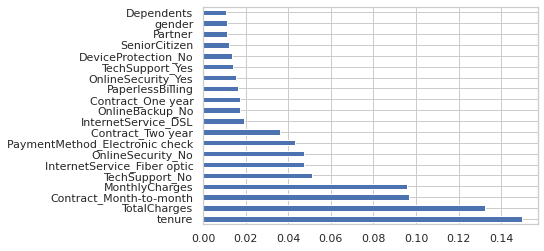

In [45]:
#feature importance
best_rf = best_clf_rf_rnd.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

- Based on the tuned random forest model, the most important features in this classification model are tenure, TotalCharges, MonthlyCharges, Contract, and TechSupport

In [46]:
#Support vector classification parameter tuning
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
                                 
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
y_predict_svc = clf_svc.predict(X_test_scaled)

svc1_tune = precision_score(y_test,y_predict_svc)
svc2_tune = recall_score(y_test,y_predict_svc)
svc3_tune = f1_score(y_test,y_predict_svc)
svc4_tune = accuracy_score(y_test,y_predict_svc)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC
Best Score: 0.7950033015558582
Best Parameters: {'kernel': 'poly', 'degree': 2, 'C': 0.1}


In [47]:
#xgboost parameter tuning
xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
y_predict_xgb = clf_xgb.predict(X_test_scaled)

xgb1_tune = precision_score(y_test,y_predict_xgb)
xgb2_tune = recall_score(y_test,y_predict_xgb)
xgb3_tune = f1_score(y_test,y_predict_xgb)
xgb4_tune = accuracy_score(y_test,y_predict_xgb)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.7897185423630886
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 2, 'learning_rate': 0.5, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [48]:
dic = {'Model':['LogisticRegression', 'RandomForestClassifier', 'SVC', 'XGB'],
       'Precision':[lr1_tune, rf1_tune, svc1_tune, xgb1_tune],
       'Recall':[lr2_tune, rf2_tune, svc2_tune, xgb2_tune],
       'F1':[lr3_tune, rf3_tune, svc3_tune, xgb3_tune],
       'Accuracy':[lr4_tune, rf4_tune, svc4_tune, xgb4_tune]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy
2,SVC,0.706633,0.493761,0.581322,0.810900
0,LogisticRegression,0.665975,0.572193,0.615532,0.809953
1,RandomForestClassifier,0.675439,0.549020,0.605703,0.809953
3,XGB,0.605691,0.531194,0.566002,0.783412


In [49]:
best_lr = best_clf_lr.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf_rnd.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

In [50]:
#voting classifier using tuned models
voting_clf_xgb = VotingClassifier(estimators = [('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')
print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train_scaled,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train_scaled,y_train,cv=5).mean())

voting_clf_xgb : [0.78375635 0.81522843 0.79573171 0.80792683 0.80386179]
voting_clf_xgb mean : 0.8015042713878916


In [51]:
best_clf_vc = voting_clf_xgb.fit(X_train_scaled, y_train)
y_predict_vc = best_clf_vc.predict(X_test_scaled)

vc1_tune = precision_score(y_test,y_predict_vc)
vc2_tune = recall_score(y_test,y_predict_vc)
vc3_tune = f1_score(y_test,y_predict_vc)
vc4_tune = accuracy_score(y_test,y_predict_vc)
cv_mean = cross_val_score(voting_clf_xgb,X_train_scaled,y_train,cv=5).mean()

dic = {'Model':['Voting Classifier XGB'],
       'Precision': [vc1_tune],
       'Recall':[vc2_tune],
       'F1':[vc3_tune],
       'Accuracy':[vc4_tune],
       'Cross Validation':[cv_mean]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Cross Validation
0,Voting Classifier XGB,0.689888,0.547237,0.610338,0.814218,0.801504


- The final model chosen is the one with the highest F1 score metrics. These metrics are used because they are suitable for evaluating imbalanced data

## Modeling predictions with Soft Voting Classifier

In [55]:
print(classification_report(y_test, y_predict_vc))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.77      0.73      0.74      2110
weighted avg       0.81      0.81      0.81      2110



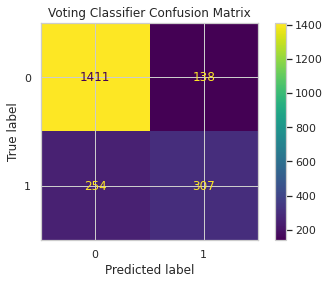

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set(style='whitegrid')
cm = confusion_matrix(y_test, y_predict_vc)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Voting Classifier Confusion Matrix")
plt.show()

In [57]:
#convert output to dataframe 
final_prediction = {'customerID': X_test.customerID, 'Churn Prediction': y_predict_vc, 'Real Churn': y_test}
final_prediction = pd.DataFrame(data=final_prediction)
final_prediction.head(20)

,customerID,Churn Prediction,Real Churn
5710,6297-NOOPG,0,0
2513,9565-AXSMR,0,0
1078,9845-PEEKO,0,0
5711,1891-UAWWU,0,1
6574,6969-MVBAI,1,0
3475,8610-ZIKJJ,0,0
2054,9734-UYXQI,1,1
5793,3873-NFTGI,0,0
6516,6876-ADESB,1,1
2416,8982-NHAVY,0,0


## References

- Feature selection: https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43
- Modelling + Tuning: https://www.kaggle.com/code/kenjee/titanic-project-example/notebook